In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os

In [ ]:
os.chdir('/kaggle/input/novel-corona-virus-2019-dataset/')
os.listdir()

In [20]:
covid_data = pd.read_csv("covid_19_data.csv")
covid_data.head()


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
#latest update
covid_data['Last Update']=pd.to_datetime(covid_data['Last Update'])
recent_date=covid_data['Last Update'].max()
print(recent_date)

In [ ]:
#total affected countries and states
country=covid_data['Country/Region'].unique()
state=covid_data['Province/State'].unique()
country_count=covid_data['Country/Region'].nunique()
state_count=covid_data['Province/State'].nunique()

print('Countries affected : %d' %country_count )
print('States affected : %d' %state_count)

#print(country)
#print(state)

In [22]:
#top countries confirmed, recovered, deaths
conf_dict ={}
recov_dict={}
deaths_dict={}

for cntry in country:
    cntry_data=covid_data[covid_data['Country/Region']==cntry]
    max_date=cntry_data['ObservationDate'].max()
    subset=cntry_data[cntry_data['ObservationDate']==max_date]
    confirmed=subset['Confirmed'].sum()
    recovered=subset['Recovered'].sum()
    deaths=subset['Deaths'].sum()
    
    conf_dict[cntry]=confirmed
    recov_dict[cntry]=recovered
    deaths_dict[cntry]=deaths

In [28]:
confirm_dict_sorted = sorted(conf_dict.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
deaths_dict_sorted = sorted(deaths_dict.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
recover_dict_sorted = sorted(recov_dict.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)

top10_confirmed=dict(confirm_dict_sorted[:10])
top10_recovered=dict(recover_dict_sorted[:10])
top10_death=dict(deaths_dict_sorted[:10])

print(top10_confirmed)
print(top10_recovered)
print(top10_death)

{'US': 308850.0, 'Spain': 126168.0, 'Italy': 124632.0, 'Germany': 96092.0, 'France': 90848.0, 'Mainland China': 81638.0, 'Iran': 55743.0, 'UK': 42477.0, 'Turkey': 23934.0, 'Switzerland': 20505.0}
{'Mainland China': 76763.0, 'Spain': 34219.0, 'Germany': 26400.0, 'Italy': 20996.0, 'Iran': 19736.0, 'France': 15572.0, 'US': 14652.0, 'Switzerland': 6415.0, 'South Korea': 6325.0, 'Belgium': 3247.0}
{'Italy': 15362.0, 'Spain': 11947.0, 'US': 8407.0, 'France': 7574.0, 'UK': 4320.0, 'Iran': 3452.0, 'Mainland China': 3326.0, 'Netherlands': 1656.0, 'Germany': 1444.0, 'Belgium': 1283.0}


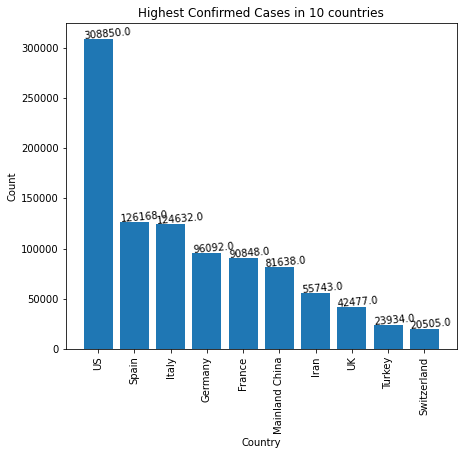

In [29]:
#confirmed cases

plt.figure(figsize = (7,6))
bars = plt.bar(top10_confirmed.keys(), top10_confirmed.values())
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Highest Confirmed Cases in 10 countries')
plt.xticks(list(top10_confirmed.keys()), rotation = 90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval, rotation = 5)
plt.show()

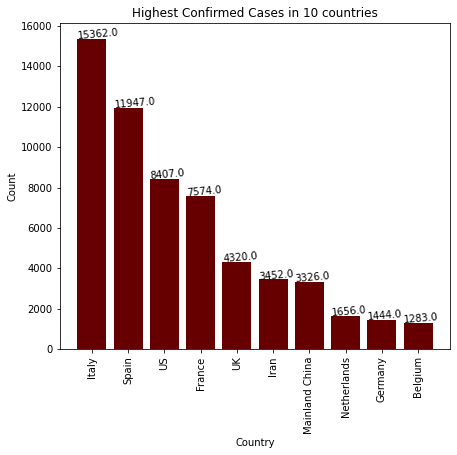

In [34]:
#deaths

plt.figure(figsize = (7,6))
bars = plt.bar(top10_death.keys(), top10_death.values(),color=(0.4,0,0,1))
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Highest Confirmed Cases in 10 countries')
plt.xticks(list(top10_death.keys()), rotation = 90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval, rotation = 5)
plt.show()

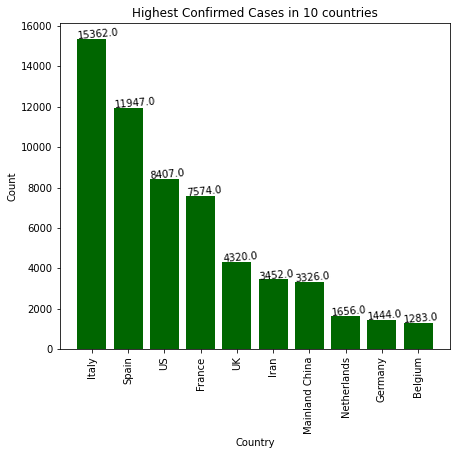

In [35]:
#recovered

plt.figure(figsize = (7,6))
bars = plt.bar(top10_death.keys(), top10_death.values(),color=(0,0.4,0,1))
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Highest Confirmed Cases in 10 countries')
plt.xticks(list(top10_death.keys()), rotation = 90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval, rotation = 5)
plt.show()

In [36]:
#static top 10
top10_confirmed=['US','Spain','Italy','Germany','France','Mainland China','Iran','UK','Turkey','Switzerland']
top10_deaths=['Italy','Spain','US','France','UK','Iran','Mainland China','Netherlands','Germany','Belgium']
top10_recovered=['Italy','Spain','US','France','UK','Iran','Mainland China','Netherlands','Germany','Belgium']

top_c_data=covid_data[covid_data['Country/Region'].isin(top10_confirmed)]
top_d_data=covid_data[covid_data['Country/Region'].isin(top10_deaths)]
top_r_data=covid_data[covid_data['Country/Region'].isin(top10_recovered)]

#top_c_data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
11924,11925,04/04/2020,Wisconsin,US,2020-04-04 23:41:02,2030.0,54.0,0.0
11925,11926,04/04/2020,Wyoming,US,2020-04-04 23:41:02,187.0,0.0,0.0
11926,11927,04/04/2020,Xinjiang,Mainland China,2020-04-04 23:41:02,76.0,3.0,73.0
11928,11929,04/04/2020,Yunnan,Mainland China,2020-04-04 23:41:02,184.0,2.0,172.0


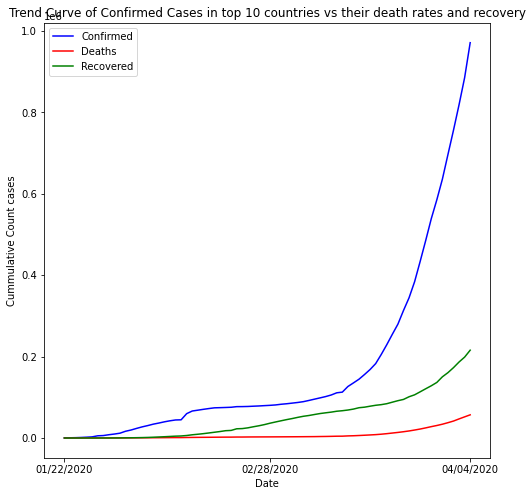

In [41]:
#top confirmed vs death rate and recovery
date = []
c = []
d = []
r = []
for dat in top_c_data['ObservationDate'].unique():
    sub = top_c_data[top_c_data['ObservationDate'] == dat]
    confirm = sub['Confirmed'].sum()
    death = sub['Deaths'].sum()
    recover = sub['Recovered'].sum()
    date.append(dat)
    c.append(confirm)
    d.append(death)
    r.append(recover)
    
date = pd.Series(date)
c  =pd.Series(c)
d = pd.Series(d)
r = pd.Series(r)

t = [date.min(), date[len(date)//2], date.max()]
plt.figure(figsize=(8,8))
plt.plot(date, c, color = 'blue')
plt.plot(date, d, color = 'red')
plt.plot(date, r, color = 'green')
plt.xticks(t, t)
plt.xlabel('Date')
plt.ylabel('Cummulative Count cases')
plt.title('Trend Curve of Confirmed Cases in top 10 countries vs their death rates and recovery')
plt.legend(['Confirmed','Deaths','Recovered'])
plt.show()

In [ ]:
top_c_data